In [8]:
import pandas as pd
import numpy as np

np.random.seed(42)
hours=np.arange(24)

notif= np.random.poisson(lam=10,size=24)
screentime= np.random.normal(loc=60,scale=15,size=24)
ambient_noise= np.random.normal(loc=40,scale=15,size=24)
app_switches=np.random.randint(5,25,size=24)

focus_rating=(
    1
    -(notif/notif.max())*0.3
    -(screentime/screentime.max())*0.3
    -(ambient_noise/ambient_noise.max())*0.2
    -(app_switches/app_switches.max())*0.2
)
focus_rating= np.clip(focus_rating,0,1).round(2)

df= pd.DataFrame({
    "Hour": hours,
    "Notif": notif,
    "Screen_Time": screentime.round(1),
    "Ambient_Noise": ambient_noise.round(1),
    "App_Switches": app_switches,
    "Focus_Rating": focus_rating
})

df.to_csv("Digital_Silence_Data.csv", index=False)
df.head()

,Hour,Notif,Screen_Time,Ambient_Noise,App_Switches,Focus_Rating
0,0,12,64.9,0.7,11,0.42
1,1,6,54.2,52.3,10,0.42
2,2,11,49.8,41.3,12,0.35
3,3,14,69.2,35.5,13,0.23
4,4,7,75.5,41.4,9,0.37


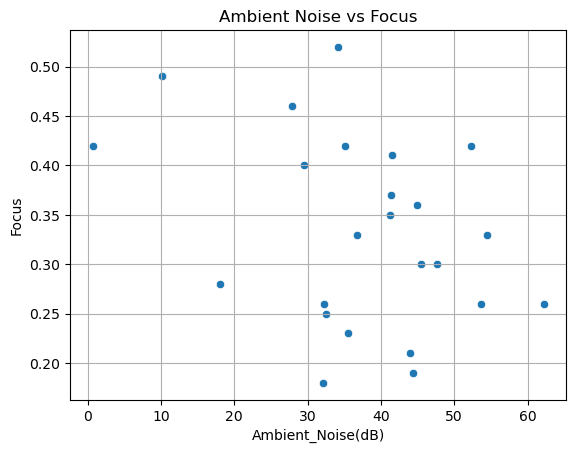

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.scatterplot(x='Ambient_Noise',y='Focus_Rating',data=df)
plt.title("Ambient Noise vs Focus")
plt.xlabel('Ambient_Noise(dB)')
plt.ylabel('Focus')
plt.grid()
plt.show()

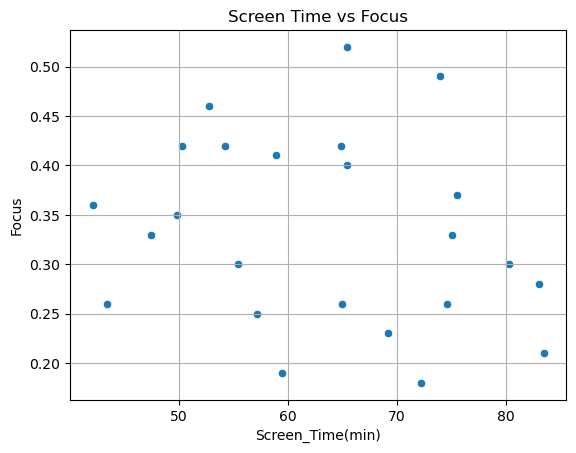

In [14]:
sn.scatterplot(x='Screen_Time',y='Focus_Rating',data=df)
plt.title("Screen Time vs Focus")
plt.xlabel('Screen_Time(min)')
plt.ylabel('Focus')
plt.grid()
plt.show()

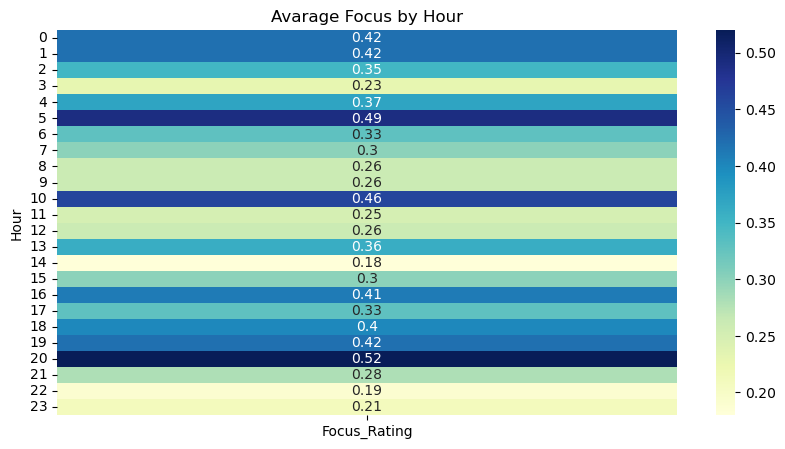

In [16]:
hourly_focus=df.groupby('Hour')['Focus_Rating'].mean().reset_index()

plt.figure(figsize=(10,5))
sn.heatmap(hourly_focus.pivot_table(values='Focus_Rating',index='Hour'), annot=True, cmap="YlGnBu")
plt.title('Avarage Focus by Hour')
plt.show()

In [17]:
df=pd.get_dummies(df, columns=['Hour'], drop_first=True)
df

,Notif,Screen_Time,Ambient_Noise,App_Switches,Focus_Rating,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,12,64.9,0.7,11,0.42,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6,54.2,52.3,10,0.42,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,11,49.8,41.3,12,0.35,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,14,69.2,35.5,13,0.23,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7,75.5,41.4,9,0.37,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,8,74.0,10.2,5,0.49,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,9,47.4,36.7,23,0.33,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,11,55.4,45.4,14,0.30,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,8,65.0,62.2,16,0.26,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,74.6,32.2,19,0.26,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Notif', 'Screen_Time', 'Ambient_Noise', 'App_Switches']] = scaler.fit_transform(
    df[['Notif', 'Screen_Time', 'Ambient_Noise', 'App_Switches']]
)

In [21]:
from sklearn.model_selection import train_test_split

x=df_scaled.drop('Focus_Rating', axis=1)
y=df_scaled['Focus_Rating']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [22]:
len(x_train)

19

In [24]:
len(x_test)

5

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [62]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [35]:
lr.score(x_test,y_test)

0.9895921127788122

In [63]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [55]:
dt.score(x_test,y_test)

-2.019257221458047

In [64]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf= rf.predict(x_test)

In [58]:
rf.score(x_test,y_test)

0.4401396148555715

In [66]:
def evaluate(y_true,y_pred,model):
    f"\n{model}"
    f"R² score :{r2_score(y_test,y_pred):4f}"
    f"MSE :{mean_squared_error(y_test,y_pred):4f}"
    f"MAE :{mean_absolute_error(y_test,y_pred):4f}"

In [67]:
evaluate(y_test,y_pred_lr,"LinearRegression")
evaluate(y_test,y_pred_dt,"DecisionTreeRegressor")
evaluate(y_test,y_pred_rf,"RandomForestRegressor")

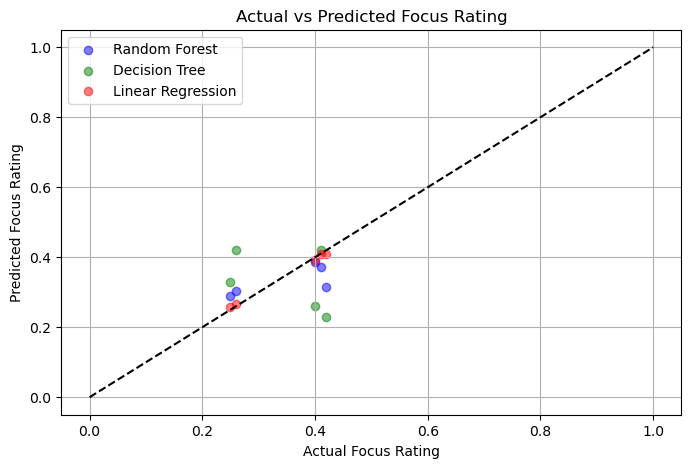

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label='Random Forest')
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='green', label='Decision Tree')
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='red', label='Linear Regression')

plt.plot([0, 1], [0, 1], 'k--')  # Line of perfect prediction
plt.xlabel('Actual Focus Rating')
plt.ylabel('Predicted Focus Rating')
plt.legend()
plt.title('Actual vs Predicted Focus Rating')
plt.grid()
plt.show()

In [71]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid, cv=3, scoring='r2')
grid_ridge.fit(x_train, y_train)

print("Best Ridge Parameters:", grid_ridge.best_params_)
print("Best Ridge Score     :", grid_ridge.best_score_)

best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(x_test)
evaluate(y_test, y_pred_ridge, "Tuned Ridge Regression")


Best Ridge Parameters: {'alpha': 0.01}
Best Ridge Score     : 0.9824124139197782
